Prve tri celije inicijalizuju podatke itd. Tu nista nije preterano zanimljivo :)

In [20]:
import pandas as pd

Wdf = pd.DataFrame({'W_Kanom':[0.003314, 0.006613, 0.008815], 'W_GOR': [0.000110, 0.000240, 0.000680], 'W_mu':[0.000032, 0.000084, 0.00012],
                     'W_PI':[0.00832, 0.011927, 0.080346], 'W_OOIP':[0.013546, 0.039071, 0.086332], 'W_Ed':[0.325466, 0.942064, 1.566234]})

Wdf

,W_Kanom,W_GOR,W_mu,W_PI,W_OOIP,W_Ed
0,0.003314,0.00011,0.000032,0.008320,0.013546,0.325466
1,0.006613,0.00024,0.000084,0.011927,0.039071,0.942064
2,0.008815,0.00068,0.000120,0.080346,0.086332,1.566234


In [22]:
df = pd.DataFrame(columns = ['SKanom', 'SGOR', 'Smu', 'SPI', 'SOOIP', 'SEd'])

df.loc[0] = ([1.000232, 3.665075, 3.667764, 3.999444, 1.262433, 1.494647])
df.loc[1] = ([1.000232, 3.665075, 3.667764, 3.999444, 1.002596, 2.285886])
df.loc[2] = ([1.000232, 3.665075, 3.667764, 3.999444, 1.001298, 2.466327])
df.loc[3] = ([4.590591, 3.669525, 2.332236, 0.877914, 1.000278, 2.225863])
df.loc[4] = ([4.590591, 3.668134, 2.332236, 0.877914, 1.006860, 1.677451])

df

,SKanom,SGOR,Smu,SPI,SOOIP,SEd
0,1.000232,3.665075,3.667764,3.999444,1.262433,1.494647
1,1.000232,3.665075,3.667764,3.999444,1.002596,2.285886
2,1.000232,3.665075,3.667764,3.999444,1.001298,2.466327
3,4.590591,3.669525,2.332236,0.877914,1.000278,2.225863
4,4.590591,3.668134,2.332236,0.877914,1.006860,1.677451


In [70]:
def rci (dataRow, weightsRow):
    return (
        dataRow['Smu'] * weightsRow['W_mu']
        + dataRow['SGOR'] * weightsRow['W_GOR']
        + dataRow['SKanom'] * weightsRow['W_Kanom']
        + dataRow['SPI'] * weightsRow['W_PI']
        + dataRow['SOOIP'] * weightsRow['W_OOIP']
        + dataRow['SEd'] * weightsRow['W_Ed'])


def rf(rci):
    return 100 - 15 * rci + 1/rci # lazna formula, cisto da imam nesto sto moze da se plotuje


print(f"Primer. RCI: {rci(df.loc[0], Wdf.loc[1])}, RF: {rf(rci(df.loc[0], Wdf.loc[1]))}")

Primer. RCI: 1.512881264131, RF: 77.96777144336889


Za pocetak, plotujemo jedan grafik.
Napravimo novu tabelu tako sto racunamo RCI i RF za sve vrednosti `df` frejma i prvi red `Wdf` frejma.

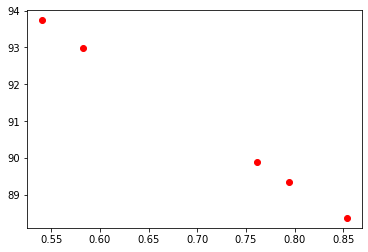

In [85]:
import matplotlib.pyplot as plt

dfPlot = df.apply(lambda row: rci(row, Wdf.loc[0]), axis = 1)

plt.plot(dfPlot, rf(dfPlot), 'ro')

Sad u `for` petlji za svaki red `Wdf-a` uradimo ovo isto i dobijamo tri grafika:

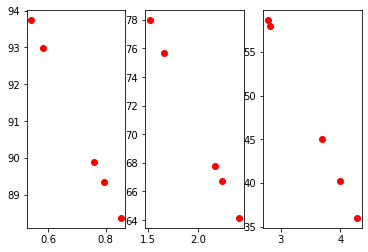

In [84]:
figure, axis = plt.subplots(1, 3)

for i, WdfRow in Wdf.iterrows():
    dfPlot = df.apply(lambda row: rci(row, WdfRow), axis = 1)
    axis[i].plot(dfPlot, rf(dfPlot), 'ro')

plt.show()